In [3]:
import sys, os
import json
import pandas as pd
import numpy as np
import time, math
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300
})


def get_result(v, num_nodes, run, interval = 1000):
    with open(f'../res/v{v}_parsed/summary_collision_n{num_nodes}_i{interval}_r{run}.json') as f:
        data = json.load(f)
        return data

def plot_collsion_rate(n_runs=50):
    v = 22
    A = (0.509 * 2.5)**2 * math.pi
    ii = np.arange(1, 61)
    n = 80
    files_missing = 0

    collision_rates = []
    for i in ii:
        c = []
        for r in range(0, n_runs):
            try:
                data = get_result(v, n, r, i)
                cr = data['collision_rate']
                if cr > -1:
                    c.append((cr) * 100)
            except:
                files_missing += 1

        collision_rates.append(np.array(c))
        #collision_rates.append(np.percentile(c, 90))
    # plt.plot(np.array(nn) * 1000/ (i * A), np.array(collision_rates) * 100, label=f'i={i}')
    collision_rates_m = np.array([np.mean(xi) for xi in collision_rates])
    
    positions = n * 1000 / (ii * A)
    #positions = nn

    plt.violinplot(collision_rates, positions, widths=0.5, showmeans=True, showmedians=False, showextrema=False)
    plt.plot(positions, collision_rates_m, color='#1f77b4', label=f'i={i}')
    #plt.plot([positions[0], positions[-1]], [collision_rates_m[0], collision_rates_m[-1]], color='#333', label=f'i={i}')
    plt.axis([0, 12000, 0, 100])
    print(f'i={i}, files_missing={files_missing}')

def main():
    plot_collsion_rate(200)
    #main(120)
    #main(240)
    # plt.legend()

    
    plt.ylabel('Collisison Rate [\%]')
    plt.xlabel('Traffic Density [Erlang / km2]')
    #plt.xlabel('Send Interval')
    plt.show()


i=60, files_missing=8976


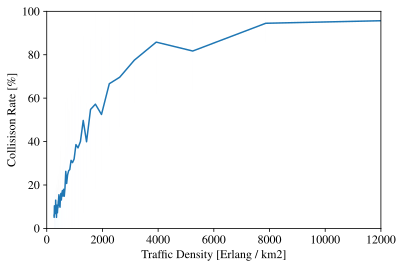

In [4]:
main()